In [249]:
##Paso1: importar librerias necesarias 
import pandas as pd
import numpy as np

from skimpy import skim
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns

In [250]:
## Cargar la base de datos y ver las primeras filas con head 
df = pd.read_csv(r'C:\Users\CATALINA\OneDrive\Desktop\proyectoICAM\ReporteICAM.csv') 
df.head()

,ano,muestreo,departamento,estacion,coduer,sustrato,latitud,longitud,ca_cla,ca_cte,...,hdd,no3,od,ph,po4,sst,icam,icam_calificacion,num_variables,confianza
0,2018,2018--2,ATLANTICO,Bocas de Ceniza (B),C08001003,Agua Estuarina,11.104833,-74.853778,84.38,23.94,...,0.24,234.0,5.41,7.31,42.0,242.0,36.00,INADECUADA,7,0.87
1,2018,2018--1,ATLANTICO,C. Balboa,C08002011,Agua Estuarina,10.984842,-74.965589,21.19,93.86,...,0.18,-1.0,8.76,8.31,7.0,49.9,67.46,ACEPTABLE,6,0.78
2,2018,2018--2,ATLANTICO,C. Balboa,C08002011,Agua Estuarina,10.984842,-74.965589,47.18,82.66,...,0.16,12.9,9.42,8.25,-1.0,134.0,70.44,ADECUADA,6,0.75
3,2018,2018--1,ATLANTICO,C. Mallorquin-Playa,C08003042,Agua Estuarina,11.036472,-74.859806,22.16,NaN,...,0.47,6870.0,6.30,7.88,407.0,42.3,20.43,PESIMA,6,0.73
4,2018,2018--2,ATLANTICO,C. Mallorquin-Playa,C08003042,Agua Estuarina,11.036472,-74.859806,39.76,12.26,...,0.31,497.0,7.25,7.93,469.0,51.9,19.55,PESIMA,7,0.87


<h2>1. Exploracin de datos y limpieza </h2>

In [251]:

df.dtypes

ano                    int64
muestreo              object
departamento          object
estacion              object
coduer                object
sustrato              object
latitud              float64
longitud             float64
ca_cla               float64
ca_cte               float64
ca_cot               float64
ca_hdd               float64
ca_no3               float64
ca_od                float64
ca_ph                float64
ca_po4               float64
ca_sst               float64
eval_cla              object
eval_cte              object
eval_cot              object
eval_hdd              object
eval_no3              object
eval_od               object
eval_ph               object
eval_sst              object
eval_po4              object
cot                  float64
cla                  float64
cte                  float64
hdd                  float64
no3                  float64
od                   float64
ph                   float64
po4                  float64
sst           

In [252]:
df.shape

(1715, 39)

In [253]:
df.columns

Index(['ano', 'muestreo', 'departamento', 'estacion', 'coduer', 'sustrato',
       'latitud', 'longitud', 'ca_cla', 'ca_cte', 'ca_cot', 'ca_hdd', 'ca_no3',
       'ca_od', 'ca_ph', 'ca_po4', 'ca_sst', 'eval_cla', 'eval_cte',
       'eval_cot', 'eval_hdd', 'eval_no3', 'eval_od', 'eval_ph', 'eval_sst',
       'eval_po4', 'cot', 'cla', 'cte', 'hdd', 'no3', 'od', 'ph', 'po4', 'sst',
       'icam', 'icam_calificacion', 'num_variables', 'confianza'],
      dtype='object')

In [254]:
icam = df

In [255]:
icam.rename(columns={
    'ano':'año', 'coduer':'codigo_estacion',  'ca_cla':'calidad_clorofilaa',
    'ca_cte':'calidad_coliformes_termotolerantes', 
    'ca_cot':'calidad_carbono_organico_total', 'ca_hdd':'calidad_hdd', 
    'ca_no3':'calidad_nitratos','ca_od':'calidad_oxigeno_disuelto', 
    'ca_ph':'calidad_ph', 'ca_po4':'calidad_ortofosfatos', 
    'ca_sst':'calidad_sst', 'eval_cla':'evaluacion_clorofilaa', 
    'eval_cte':'evaluacion_coliformes_termotolerantes',
    'eval_cot':'evaluacion_carbono_organico_total', 
    'eval_hdd':'evaluacion_hdd', 'eval_no3':'evaluacion_nitratos', 
    'eval_od':'evaluacion_oxigeno_disuelto', 'eval_ph':'evaluacion_ph', 
    'eval_sst':'evaluacion_sst','eval_po4':'evaluacion_ortofosfatos', 
    'cot':'carbono_organico_total', 'cla':'clorofilaa', 
    'cte':'coliformes_termotolerantes', 'hdd':'hidrocarburos_disueltos_dispersos', 
    'no3':'nitratos', 'od':'oxigeno_disuelto', 'po4':'ortofosfatos', 
    'sst':'solidos_suspendidos_totales', 
    }
                                 , inplace = True)

In [256]:
### Columnas renombradas
icam.columns

Index(['año', 'muestreo', 'departamento', 'estacion', 'codigo_estacion',
       'sustrato', 'latitud', 'longitud', 'calidad_clorofilaa',
       'calidad_coliformes_termotolerantes', 'calidad_carbono_organico_total',
       'calidad_hdd', 'calidad_nitratos', 'calidad_oxigeno_disuelto',
       'calidad_ph', 'calidad_ortofosfatos', 'calidad_sst',
       'evaluacion_clorofilaa', 'evaluacion_coliformes_termotolerantes',
       'evaluacion_carbono_organico_total', 'evaluacion_hdd',
       'evaluacion_nitratos', 'evaluacion_oxigeno_disuelto', 'evaluacion_ph',
       'evaluacion_sst', 'evaluacion_ortofosfatos', 'carbono_organico_total',
       'clorofilaa', 'coliformes_termotolerantes',
       'hidrocarburos_disueltos_dispersos', 'nitratos', 'oxigeno_disuelto',
       'ph', 'ortofosfatos', 'solidos_suspendidos_totales', 'icam',
       'icam_calificacion', 'num_variables', 'confianza'],
      dtype='object')

In [257]:
icam.info

<bound method DataFrame.info of        año muestreo     departamento             estacion codigo_estacion  \
0     2018  2018--2        ATLANTICO  Bocas de Ceniza (B)       C08001003   
1     2018  2018--1        ATLANTICO            C. Balboa       C08002011   
2     2018  2018--2        ATLANTICO            C. Balboa       C08002011   
3     2018  2018--1        ATLANTICO  C. Mallorquin-Playa       C08003042   
4     2018  2018--2        ATLANTICO  C. Mallorquin-Playa       C08003042   
...    ...      ...              ...                  ...             ...   
1710  2024  2024--1  VALLE DEL CAUCA         H. Palm View       P76001008   
1711  2024  2024--1  VALLE DEL CAUCA       Hotel Medellin       P76001005   
1712  2024  2024--1  VALLE DEL CAUCA             La Barra       P76001002   
1713  2024  2024--1  VALLE DEL CAUCA      P. Juan de Dios       P76001025   
1714  2024  2024--1  VALLE DEL CAUCA           P. Magüipi       P76002027   

            sustrato    latitud   longitud 

Exploramos estadistica descriptiva

In [258]:
icam.describe()

,año,latitud,longitud,calidad_clorofilaa,calidad_coliformes_termotolerantes,calidad_carbono_organico_total,calidad_hdd,calidad_nitratos,calidad_oxigeno_disuelto,calidad_ph,...,coliformes_termotolerantes,hidrocarburos_disueltos_dispersos,nitratos,oxigeno_disuelto,ph,ortofosfatos,solidos_suspendidos_totales,icam,num_variables,confianza
count,1715.000000,1715.000000,1715.000000,1088.000000,1373.000000,300.000000,837.000000,1032.000000,1695.000000,1695.000000,...,1.484000e+03,1280.000000,1620.000000,1695.000000,1695.000000,1651.00000,1671.000000,1715.000000,1715.000000,1715.000000
mean,2020.723032,9.742268,-76.225471,70.347371,68.799876,63.503567,95.413023,67.105601,80.872165,86.949038,...,1.607646e+04,-0.041884,31.256723,6.543776,8.151309,15.61472,36.450916,41.297708,5.690379,0.722047
std,2.041209,3.063488,2.709086,26.258699,33.719916,26.197492,6.036562,32.422691,14.943570,10.453862,...,4.184946e+05,0.874640,194.658194,1.309667,0.315319,94.31570,69.125339,37.206620,1.314268,0.157941
min,2018.000000,1.642861,-81.732481,21.190000,0.610000,14.600000,33.330000,0.180000,1.000000,7.470000,...,-1.000000e+00,-1.000000,-1.000000,0.360000,6.020000,-1.00000,-1.000000,-1.000000,1.000000,0.120000
25%,2019.000000,9.404033,-77.411713,49.820000,45.020000,40.452500,95.010000,47.825000,77.260000,84.470000,...,4.500000e+00,-1.000000,-1.000000,6.060000,8.070000,-1.00000,7.945000,-1.000000,5.000000,0.630000
50%,2021.000000,11.021056,-75.649731,78.370000,84.510000,64.305000,97.710000,85.955000,83.140000,88.780000,...,4.900000e+01,0.120000,4.020000,6.480000,8.172000,3.32000,17.600000,45.840000,6.000000,0.750000
75%,2022.000000,11.319567,-74.223054,94.475000,98.540000,90.005000,98.800000,91.315000,89.040000,92.380000,...,5.400000e+02,0.322500,20.175000,6.985000,8.280000,8.70500,38.200000,78.835000,7.000000,0.870000
max,2024.000000,13.385900,-71.981544,100.000000,100.000000,98.620000,99.240000,99.630000,100.000000,98.760000,...,1.600000e+07,8.600000,6870.000000,20.000000,9.930000,2100.00000,1604.000000,95.930000,8.000000,1.000000


In [259]:
### Para la limpieza vamos a ver cuantos valores nulos y negativos hay en las columnas
# Calcula el porcentaje de nulos por columna mayores al 40% de los datos para eliminarlos
porcentaje_nulos1 = (icam.isnull().mean() * 100)
nulos_mayores_40 = porcentaje_nulos1[porcentaje_nulos1 > 40]
print(nulos_mayores_40)

calidad_carbono_organico_total       82.507289
calidad_hdd                          51.195335
evaluacion_carbono_organico_total    82.507289
evaluacion_hdd                       51.195335
carbono_organico_total               80.233236
dtype: float64


In [260]:
## Eliminamos las columnas que tienen valores nulos mayores al 40%
icam.drop(['calidad_carbono_organico_total','calidad_hdd',
           'evaluacion_carbono_organico_total','evaluacion_hdd',
           'carbono_organico_total'],
             axis=1, inplace=True)

In [261]:
icam.columns

Index(['año', 'muestreo', 'departamento', 'estacion', 'codigo_estacion',
       'sustrato', 'latitud', 'longitud', 'calidad_clorofilaa',
       'calidad_coliformes_termotolerantes', 'calidad_nitratos',
       'calidad_oxigeno_disuelto', 'calidad_ph', 'calidad_ortofosfatos',
       'calidad_sst', 'evaluacion_clorofilaa',
       'evaluacion_coliformes_termotolerantes', 'evaluacion_nitratos',
       'evaluacion_oxigeno_disuelto', 'evaluacion_ph', 'evaluacion_sst',
       'evaluacion_ortofosfatos', 'clorofilaa', 'coliformes_termotolerantes',
       'hidrocarburos_disueltos_dispersos', 'nitratos', 'oxigeno_disuelto',
       'ph', 'ortofosfatos', 'solidos_suspendidos_totales', 'icam',
       'icam_calificacion', 'num_variables', 'confianza'],
      dtype='object')

In [262]:
# necesitamos saber que columnas tiene valores negativos para cambiarlos
# Seleccionar solo las columnas numéricas
columnas_numericas = icam.select_dtypes(include=['number']).columns
# Contar negativos para cada columna
conteo_negativos = (icam[columnas_numericas] < 0).sum()

conteo_negativos = conteo_negativos.reset_index()
conteo_negativos.columns = ['variable', 'cantidad_negativos']

print(conteo_negativos)


                              variable  cantidad_negativos
0                                  año                   0
1                              latitud                   0
2                             longitud                1715
3                   calidad_clorofilaa                   0
4   calidad_coliformes_termotolerantes                   0
5                     calidad_nitratos                   0
6             calidad_oxigeno_disuelto                   0
7                           calidad_ph                   0
8                 calidad_ortofosfatos                   0
9                          calidad_sst                   0
10                          clorofilaa                  46
11          coliformes_termotolerantes                 111
12   hidrocarburos_disueltos_dispersos                 443
13                            nitratos                 588
14                    oxigeno_disuelto                   0
15                                  ph                  

In [263]:
## Identificamos las variables con un porcentaje menor del 40% de valores invalidos (nulos + negativos) para reemplazarlos por la media
## excepto longitud y año

columnas_excluir = ['icam', 'longitud', 'latitud', 'año']    ##Columnas que quiero excluir

# Seleccionar solo columnas numéricas y excluir las indeseadas
columnas_numericas = [col for col in icam.select_dtypes(include='number').columns if col not in columnas_excluir]

porcentaje_invalidos = {}
for col in columnas_numericas:
    nulos = icam[col].isnull().sum()
    negativos = (icam[col] < 0).sum()
    porcentaje = ((nulos + negativos) / total_registros) * 100
    porcentaje_invalidos[col] = porcentaje

# Convertimos a df para ver mejor
df_invalidos = pd.DataFrame.from_dict(porcentaje_invalidos, orient='index', columns=['% valores inválidos'])
df_invalidos.sort_values('% valores inválidos', ascending=False, inplace=True)

print(df_invalidos)


                                    % valores inválidos
hidrocarburos_disueltos_dispersos             51.195335
nitratos                                      39.825073
calidad_nitratos                              39.825073
calidad_clorofilaa                            36.559767
clorofilaa                                    36.559767
calidad_ortofosfatos                          35.276968
ortofosfatos                                  35.276968
coliformes_termotolerantes                    19.941691
calidad_coliformes_termotolerantes            19.941691
calidad_sst                                    3.498542
solidos_suspendidos_totales                    3.498542
calidad_oxigeno_disuelto                       1.166181
calidad_ph                                     1.166181
ph                                             1.166181
oxigeno_disuelto                               1.166181
num_variables                                  0.000000
confianza                                      0

In [264]:
## Procedimiento para reemplazar los valores invalidos por la media. Pendiente si es mejor utilizar la imputacion KNN

for col in columnas_numericas:
    if porcentaje_invalidos[col] < umbral:
        n_nulos = icam[col].isnull().sum()
        n_negativos = (icam[col] < 0).sum()
        total_reemplazos = n_nulos + n_negativos

        # Si no hay nada que reemplazar, no hacemos nada
        if total_reemplazos == 0:
            continue

        media_valida = icam[icam[col] >= 0][col].mean()
        icam[col] = icam[col].apply(lambda x: media_valida if pd.isnull(x) or x < 0 else x)

        # Guardamos el log
        reemplazos_log[col] = {
            'media_usada': media_valida,
            'valores_reemplazados': total_reemplazos
        }

        # Mostramos información de verificación
        print(f"[OK] Columna '{col}' - Reemplazados: {total_reemplazos}, Media usada: {media_valida:.4f}")


[OK] Columna 'calidad_clorofilaa' - Reemplazados: 627, Media usada: 70.3474
[OK] Columna 'calidad_coliformes_termotolerantes' - Reemplazados: 342, Media usada: 68.7999
[OK] Columna 'calidad_nitratos' - Reemplazados: 683, Media usada: 67.1056
[OK] Columna 'calidad_oxigeno_disuelto' - Reemplazados: 20, Media usada: 80.8722
[OK] Columna 'calidad_ph' - Reemplazados: 20, Media usada: 86.9490
[OK] Columna 'calidad_ortofosfatos' - Reemplazados: 605, Media usada: 79.5020
[OK] Columna 'calidad_sst' - Reemplazados: 60, Media usada: 75.8305
[OK] Columna 'clorofilaa' - Reemplazados: 627, Media usada: 5.9044
[OK] Columna 'coliformes_termotolerantes' - Reemplazados: 342, Media usada: 17376.2399
[OK] Columna 'nitratos' - Reemplazados: 683, Media usada: 49.6356
[OK] Columna 'oxigeno_disuelto' - Reemplazados: 20, Media usada: 6.5438
[OK] Columna 'ph' - Reemplazados: 20, Media usada: 8.1513
[OK] Columna 'ortofosfatos' - Reemplazados: 605, Media usada: 23.7125
[OK] Columna 'solidos_suspendidos_totales' -

<h3>1.1 Analisis estadístico</h3>
Media - Mediana - Moda - Varianza  - Covarianza - Desviacion estandar - curstosis

In [265]:
icam.mean


<bound method DataFrame.mean of        año muestreo     departamento             estacion codigo_estacion  \
0     2018  2018--2        ATLANTICO  Bocas de Ceniza (B)       C08001003   
1     2018  2018--1        ATLANTICO            C. Balboa       C08002011   
2     2018  2018--2        ATLANTICO            C. Balboa       C08002011   
3     2018  2018--1        ATLANTICO  C. Mallorquin-Playa       C08003042   
4     2018  2018--2        ATLANTICO  C. Mallorquin-Playa       C08003042   
...    ...      ...              ...                  ...             ...   
1710  2024  2024--1  VALLE DEL CAUCA         H. Palm View       P76001008   
1711  2024  2024--1  VALLE DEL CAUCA       Hotel Medellin       P76001005   
1712  2024  2024--1  VALLE DEL CAUCA             La Barra       P76001002   
1713  2024  2024--1  VALLE DEL CAUCA      P. Juan de Dios       P76001025   
1714  2024  2024--1  VALLE DEL CAUCA           P. Magüipi       P76002027   

            sustrato    latitud   longitud 

In [266]:
###promedio del icam por año
icam_por_anio = icam.groupby('año')['icam'].mean().reset_index()
icam_por_anio

,año,icam
0,2018,28.574125
1,2019,29.748358
2,2020,33.377937
3,2021,41.924582
4,2022,52.105210
5,2023,55.574727
6,2024,56.486517


In [268]:
# Promedio (o suma) de contaminantes medidos por año
icam.groupby('año')['num_variables'].mean()

año
2018    5.171875
2019    5.194030
2020    5.015873
2021    5.785455
2022    6.029412
2023    6.254545
2024    6.616915
Name: num_variables, dtype: float64

In [269]:
pd.unique['num_variables']

TypeError: 'function' object is not subscriptable

In [ ]:
# Para cada año, contar cuántas columnas tienen al menos un dato
contaminantes_por_año = icam.groupby('año')[contaminantes].apply(lambda df: df.notna().any()).sum(axis=1)
print(contaminantes_por_año)

año
2018    13
2019    13
2020    13
2021    13
2022    13
2023    13
2024    13
dtype: int64


<h3>2. Evolución del ICAM año tras año por departamento o estación </h3>
Criterio para analizar el ICAM

![image](image.png)


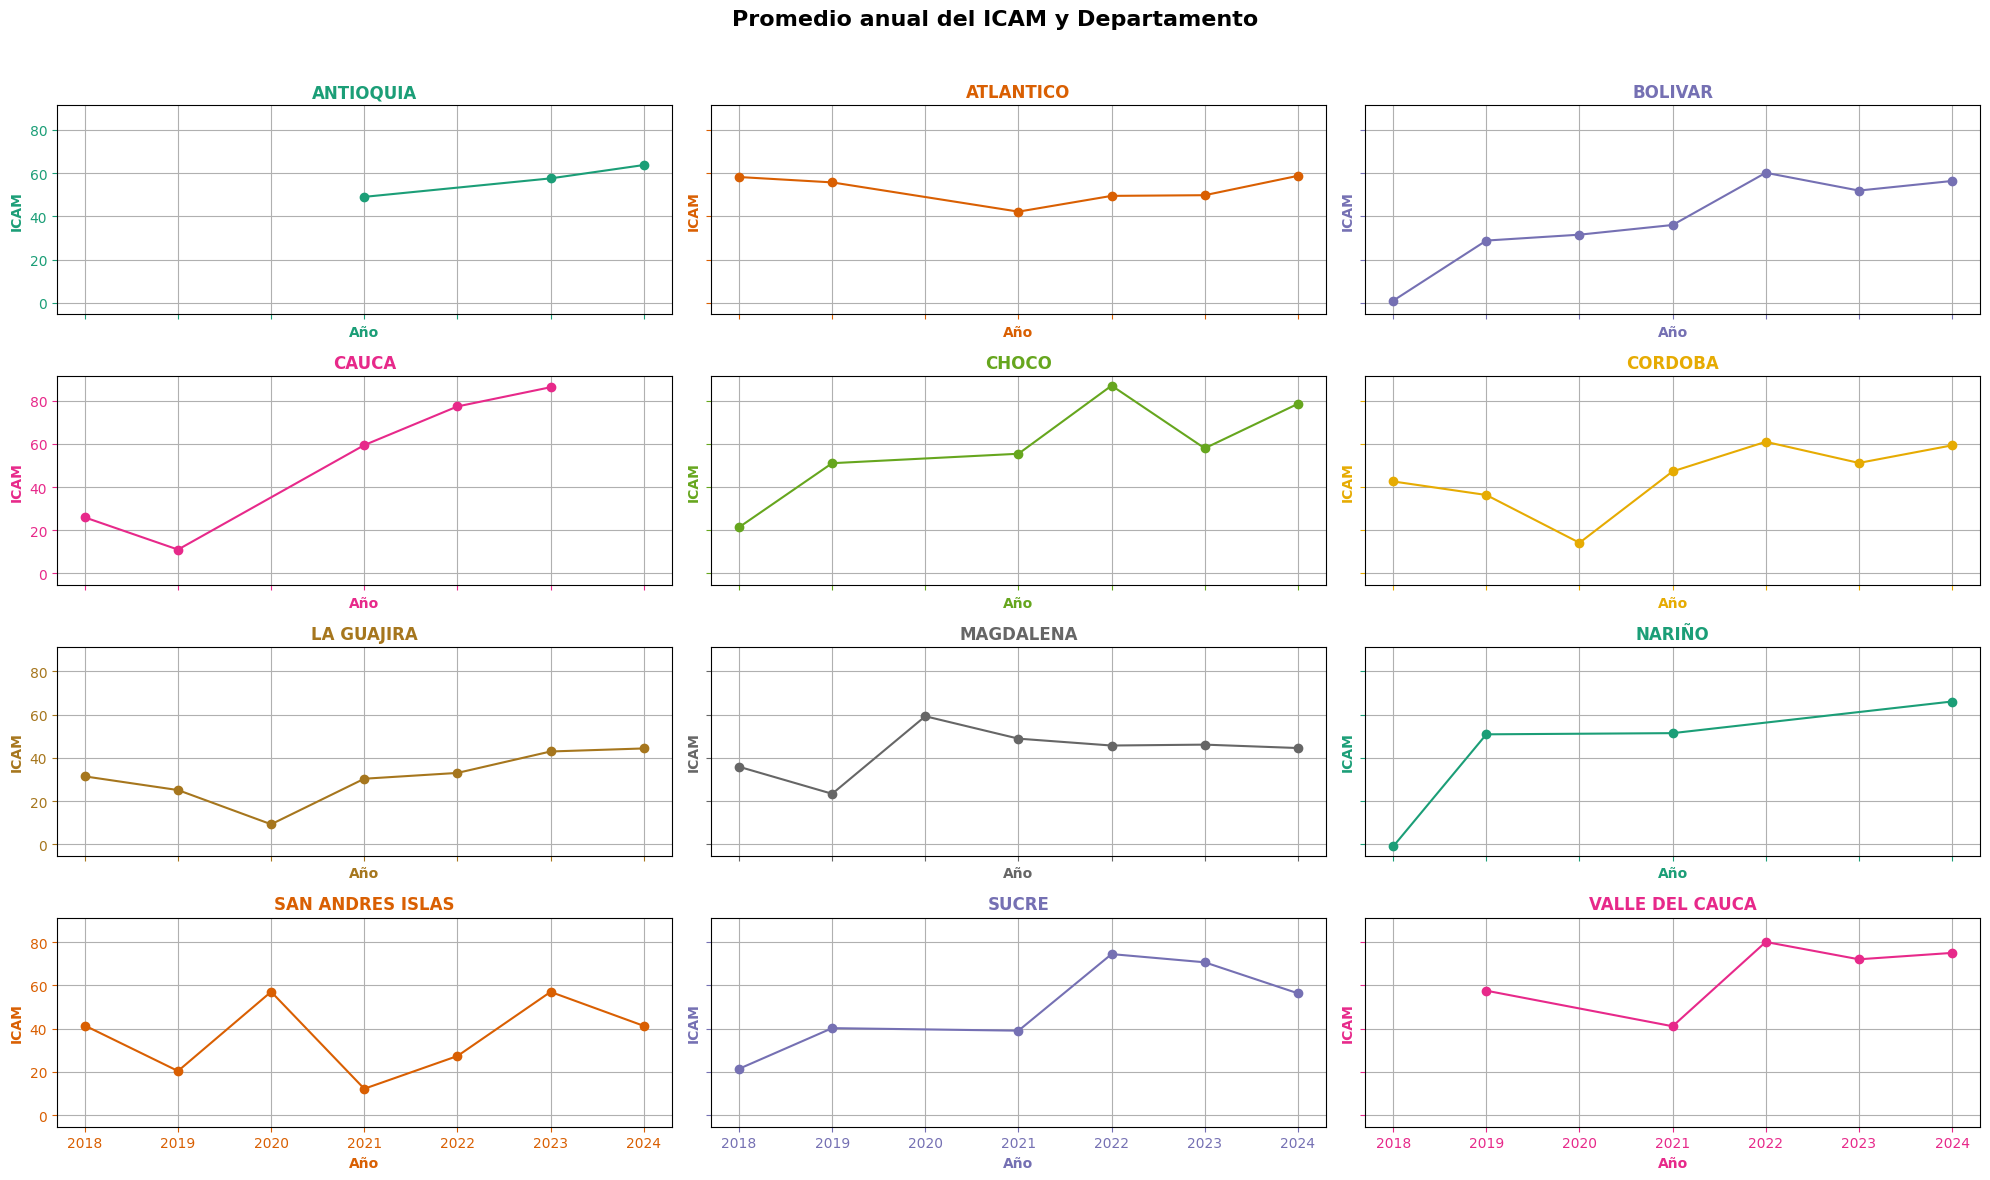

In [ ]:
icam_agrupada = icam.groupby(['departamento', 'año'])['icam'].mean().reset_index()   

departamentos = icam_agrupada['departamento'].unique()[:12]          # Lista de los primeros 12 departamentos
colors = sns.color_palette("Dark2", n_colors=len(departamentos))    # Usa una paleta de 12 colores
color_map = dict(zip(departamentos, colors))                        # Asociar un color a cada departamento

# Crear subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, depto in enumerate(departamentos):
    data_depto = icam_agrupada[icam_agrupada['departamento'] == depto]
    color = color_map[depto]

    # Línea con color personalizado
    axes[i].plot(data_depto['año'], data_depto['icam'], marker='o', color=color)

    # Título y etiquetas con el mismo color
    axes[i].set_title(depto, color=color, fontsize=12 , fontweight='bold')    ## fontweight para la letra en negrilla
    axes[i].set_xlabel('Año', color=color, fontweight='bold')
    axes[i].set_ylabel('ICAM', color=color, fontweight='bold')
    axes[i].tick_params(axis='x', colors=color)
    axes[i].tick_params(axis='y', colors=color)
    axes[i].grid(True)

# Eliminar subplots vacíos si hay menos de 12
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Promedio anual del ICAM y Departamento', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

In [ ]:
# Lista de columnas de contaminantes (calidades y/o valores directos)
contaminantes = [
    'coliformes_termotolerantes', 'nitratos', 'oxigeno_disuelto', 
    'ph', 'ortofosfatos','solidos_suspendidos_totales', 'clorofilaa'
]
icam_agr_contam = icam.groupby(['contaminantes','año'])['contaminantes'].mean().reset_index()  


colors = sns.color_palette("Dark2", n_colors=len(contaminantes))    # Usa una paleta de 12 colores
color_map = dict(zip(contaminantes, colors))                        # Asociar un color a cada departamento

# Crear subplots
fig, axes = plt.subplots(4, 3, figsize=(20, 12), sharex=True, sharey=True)
axes = axes.flatten()

for i, contam in enumerate(departamentos):
    data_contam = icam_contam[icam_contam['contaminante'] == contam]
    color = color_map[contam]

    # Línea con color personalizado
    axes[i].plot(data_depto['año'], data_depto['icam'], marker='o', color=color)

    # Título y etiquetas con el mismo color
    axes[i].set_title(depto, color=color, fontsize=12 , fontweight='bold')    ## fontweight para la letra en negrilla
    axes[i].set_xlabel('Año', color=color, fontweight='bold')
    axes[i].set_ylabel('ICAM', color=color, fontweight='bold')
    axes[i].tick_params(axis='x', colors=color)
    axes[i].tick_params(axis='y', colors=color)
    axes[i].grid(True)

# Eliminar subplots vacíos si hay menos de 12
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle('Promedio anual del ICAM y Departamento', fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

,año,clorofilaa
0,2018,6.621149
1,2019,6.302242
2,2020,5.358444
3,2021,5.287376
4,2022,4.290349
5,2023,5.079592
6,2024,8.100417


In [ ]:
### Evolucion del ICAM por departamento
icam['departamento'].value_counts()


departamento
MAGDALENA           340
SAN ANDRES ISLAS    253
LA GUAJIRA          233
CORDOBA             166
BOLIVAR             145
SUCRE               126
ATLANTICO           114
CAUCA                90
CHOCO                71
VALLE DEL CAUCA      70
NARIÑO               65
ANTIOQUIA            42
Name: count, dtype: int64

In [ ]:
## Cuenta cuántas veces aparece cada año en el DataFram
icam['año'].value_counts()


año
2019    335
2018    320
2021    275
2022    238
2023    220
2024    201
2020    126
Name: count, dtype: int64

In [ ]:
### Uso el n-unique (ojo. no es unique) para contar cuántas estaciones únicas (distintas) hay por cada año
icam.groupby('año')['estacion'].nunique()


año
2018    178
2019    177
2020     86
2021    200
2022    164
2023    177
2024    185
Name: estacion, dtype: int64

In [ ]:
####  Útil para saber cuántos registros hay por año (sin importar si hay duplicados).
icam.groupby('año')['estacion'].count()

año
2018    320
2019    335
2020    126
2021    275
2022    238
2023    220
2024    201
Name: estacion, dtype: int64

In [ ]:
repetidas = icam.groupby(['año', 'estacion']).size().reset_index(name='conteo')
repetidas = repetidas[repetidas['conteo'] > 1]
print(repetidas)


       año          estacion  conteo
0     2018        Aeropuerto       2
2     2018           Alcalis       2
4     2018        Alcatraces       2
5     2018    Antiguo Muelle       2
6     2018     Arco el Morro       2
...    ...               ...     ...
1129  2024           P. Rula       2
1140  2024        P. Venados       2
1141  2024   P. los Córdobas       2
1158  2024       S. Bernardo       2
1163  2024  Sinu - Tinajones       2

[479 rows x 3 columns]


In [ ]:
repetidas_2019 = repetidas[repetidas['año'] == 2019]
display(repetidas_2019)

,año,estacion,conteo
182,2019,Aeropuerto,2
183,2019,Agua Dulce,3
185,2019,Alcantarillado,4
186,2019,Alcatraces,2
188,2019,Arco el Morro,2
...,...,...,...
350,2019,TermoGuajira,2
351,2019,Vertimiento Gorgona,2
352,2019,Vertimiento Riohacha,2
353,2019,Yellow Moon,3


In [ ]:
icam.groupby(['año', 'estacion']).size()

año   estacion            
2018  Aeropuerto              2
      Agua Dulce              1
      Alcalis                 2
      Alcantarillado          1
      Alcatraces              2
                             ..
2024  Santa Veronica2         1
      Sinu - Tinajones        2
      Sociedad Portuaria      1
      TermoGuajira            1
      Vertimiento Riohacha    1
Length: 1167, dtype: int64

In [ ]:
## cuantas mediciones tiene una estacion por año
icam[icam['estacion'] == 'Yellow Moon'].groupby('año').size()

año
2018    1
2019    3
2021    1
dtype: int64

In [ ]:
repetidas_estacion = repetidas[(repetidas['año'] == 2019) & (repetidas['estacion'] == 'Yellow Moon')]
display(repetidas_estacion)

,año,estacion,conteo
353,2019,Yellow Moon,3


In [271]:
# Consultamos el numero de estaciones y el nombre de cada una de ellas

icam['estacion'].nunique()         ### esta linea me indicó un total de 239 estaciones
pd.unique(icam['estacion'])

array(['Bocas de Ceniza (B)', 'C. Balboa', 'C. Mallorquin-Playa',
       'Caño Dulce', 'P. Pradomar', 'P. Puerto Colombia', 'P. Salgar2',
       'Punta Astillero', 'Punta Roca', 'Rincon Hondo', 'Santa Veronica2',
       'Alcalis', 'Astillero Naval', 'Boya 41', 'Escollera submarina',
       'F. Emisario', 'Faro Galerazamba', 'Isla Baru', 'M. Oceanografico',
       'P. Boca Canoa', 'P. Bocagrande', 'P. Crespo', 'P. Isla Arena',
       'P. Manzanillo', 'P. Marbella', 'Punta Canoa', 'Roja Bocachica',
       'Roja F. Corelca', 'Tierra Bomba', 'Verde F. Caño Loro',
       'Verde Polvorin', 'Antiguo Muelle', 'Bocana Timbiqui', 'F. Guajui',
       'F. Guapi boya', 'F. Micay', 'F. Saija', 'F. Timbiqui',
       'Gorgonilla', 'Horno Gorgona', 'P. Blanca', 'Vertimiento Gorgona',
       'Bahia Solano', 'Ensenada de Utría', 'Estero Tribugá',
       'F. Bahia Solano', 'F. Nuqui', 'F. valle', 'Jurubidá estero',
       'P. Almejal', 'P. Huina', 'P. Jurubida', 'P. Nuqui', 'P. Tribugá',
       'C. Bahia 

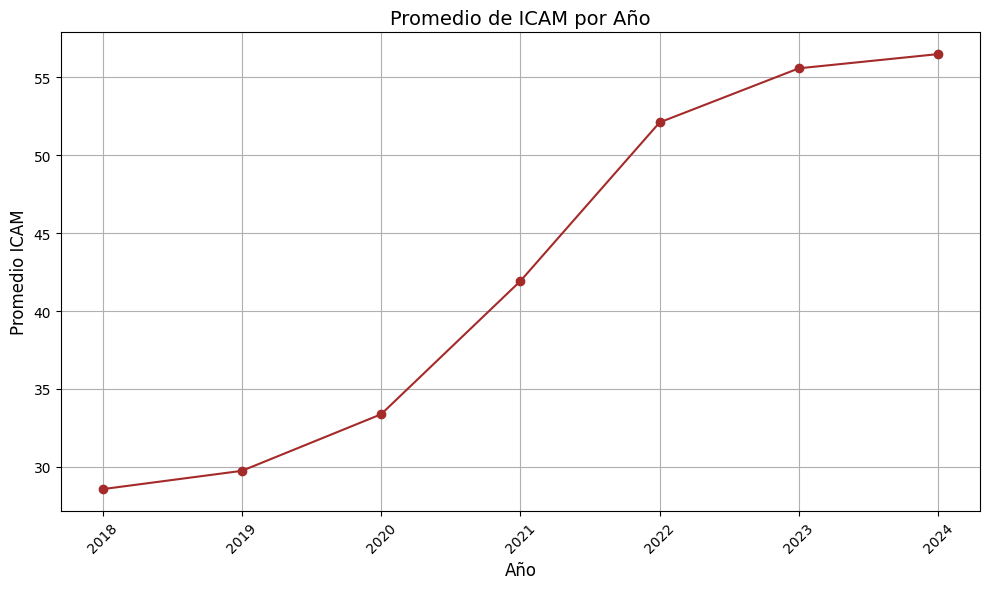

In [ ]:
# Agrupamos por año y calculamos el promedio de icam
icam_por_anio = icam.groupby('año')['icam'].mean().reset_index()

# Gráfica
plt.figure(figsize=(10, 6))
plt.plot(icam_por_anio['año'], icam_por_anio['icam'], marker='o', linestyle='-', color='brown')
plt.title('Promedio de ICAM por Año', fontsize=14)
plt.xlabel('Año', fontsize=12)
plt.ylabel('Promedio ICAM', fontsize=12)
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


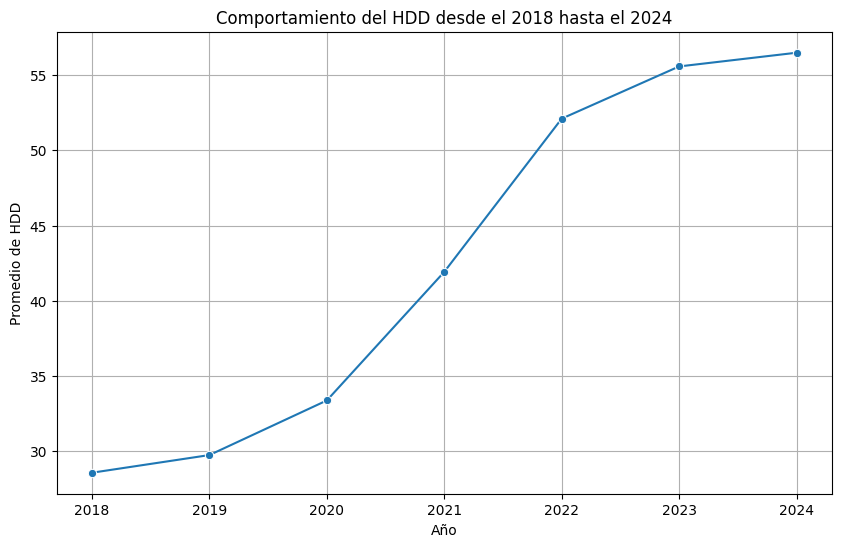

In [ ]:
icam['año'] = icam['año'].astype(int)

# Agrupar por año para calcular la media de HDD por cada estacion de medicion.
hdd_por_año = icam.groupby('año')['icam'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=hdd_por_año, x='año', y='icam', marker='o')
plt.title('Comportamiento del ICAM desde el 2018 hasta el 2024')
plt.xlabel('Año')
plt.ylabel('Promedio de ICAM')
plt.grid(True)
plt.show()